<a href="https://colab.research.google.com/github/MLEbyNoman/ArrayToolKit/blob/main/Gradient_Decent_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**_DNN_**

**_Gradient descent_**

**_Gradient descent in 1D_**


In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

**_Gradient descent in 1D_**

In [2]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

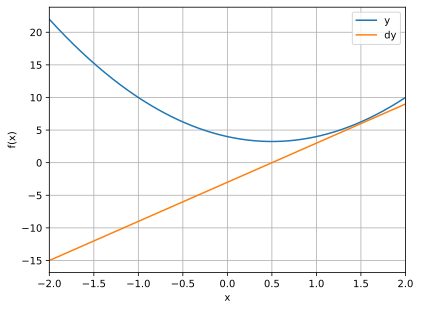

In [3]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]]) #This will set the x-axis limits to the first and last values of the x array. Set x-axis limits from x[0] (-2) to x[-1] (2)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [4]:
# random starting point
localmin = np.random.choice(x,1)
print(localmin)

# learning parameters
learning_rate = .01 #try 1, and 0.001
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

[0.076]


array([0.49912873])

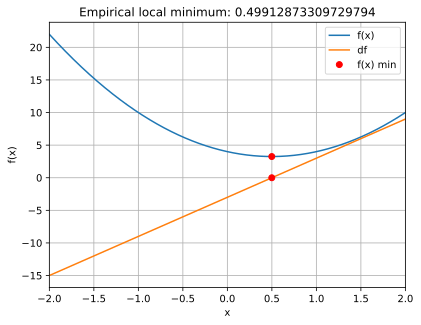

In [5]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

**_Store the model parameters and outputs on each iteration_**

In [6]:
# random starting point
localmin = np.random.choice(x,1)
print(localmin)
# learning parameters
learning_rate = .01
training_epochs = 100
# check with different combinations for learning rate and epochs. For instnace, if 0.001 and number of epochs is less then it
# will not be reached to the minimum with a low learning rate in only 100 epochs. Then increase no of epochs or slightly increase
# the learning rate. Giving large learning rate, will miss the minimum.

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin[0]
  modelparams[i,1] = grad[0]


[0.88]


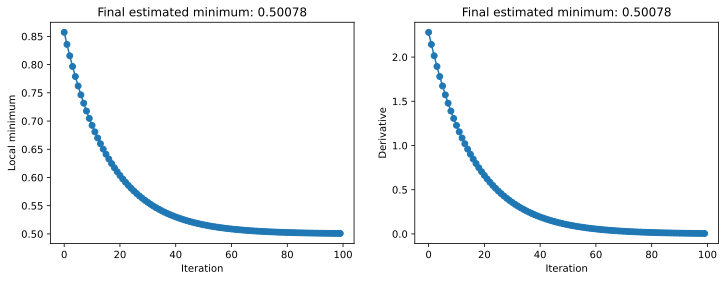

In [7]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

**_Additional explorations_**

In [8]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
#
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
#
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative
#    instead of a specified number of training epochs?
#

**_Gradient descent
 CodeChallenge: Unfortunate starting value_**


In [9]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

**_Gradient descent in 1D_**

In [10]:
# function (as a function)
def fx(x):
  return np.cos(2*np.pi*x) + x**2

# derivative function
def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x) + 2*x

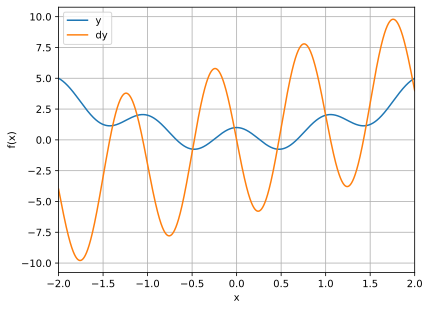

In [11]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [12]:
# random starting point
localmin = np.random.choice(x,1) #np.array([0])#
# At np.array([0])Vanishing gradient refers to the phenomenon that the gradient, the derivative gets so incredibly tiny,
# so close to zero, that learning effectively stops.

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

array([-0.47580245])

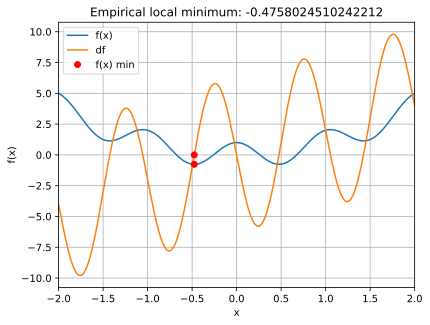

In [13]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

**_Additional explorations_**

In [15]:
# 1) The derivative has a multiplicative factor of 2 in it. Is that constant necessary for the accuracy of the g.d. result?
#    Try removing that '2' from the derivative and see whether the model can still find the minimum. Before running the
#    code, think about what you expect to happen. Does reality match your expectations? Why is (or isn't) that factor necessary?
#
# 2) What about the factor of '2' inside the np.sin() function? Is that important? Can you get an accurate result if you
#    remove it?
#
# 3) Try setting the initial value to a small but non-zero number, e.g., .0001 or -.0001. Does that help the solution?
#

**_Gradient descent_**

**_Gradient descent in 2D_**


In [16]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

**_Gradient descent in 2D_**

In [17]:
# This code defines a function peaks(x, y) that generates a 2D surface (a matrix of values, z) based on a mathematical expression.
# the "peaks" function
def peaks(x,y): # This function takes two arguments, x and y, which are expected to be arrays (or lists) of numerical values.
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y) # It creates two 2D arrays (grids) from the input 1D arrays x and y. x is repeated along rows, and y is repeated along columns to create a grid of points over the 2D plane. This operation is used to evaluate functions over a 2D grid.

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

1.   The function peaks(x, y) generates a 2D surface (i.e., a matrix of values) based on the mathematical expression provided.
2.  It first creates a 2D grid from the input x and y arrays using np.meshgrid().
3. It then calculates the values of z for each pair of (x, y) coordinates on this grid using a combination of polynomial and exponential terms.
4. The result z is a 2D array that can be used for visualization or further analysis.

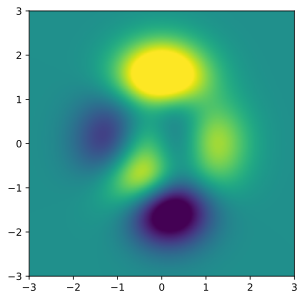

In [18]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
# extent=[x[0], x[-1], y[0], y[-1]] ensures the x and y axes are scaled according to the x and y arrays.
plt.show()

*   plt.imshow() is used to display a 2D matrix (Z) as an image.
*   extent controls the coordinate range for the plot's axes based on x and y.
* vmin and vmax control the color scale range.
* origin='lower' places the origin in the lower-left corner of the plot. This parameter controls the orientation of the image (i.e., where the origin of the axes is placed). origin='lower' means that the (0,0) coordinate of the image is at the bottom-left corner.
* vmin and vmax control the color scaling of the plot (the colormap).
* vmin=-5: This sets the lower limit of the color scale to -5. Values in Z that are smaller than -5 will be mapped to the lowest color in the colormap.
* vmax=5: This sets the upper limit of the color scale to 5. Values in Z that are greater than 5 will be mapped to the highest color in the colormap.
* Essentially, vmin and vmax are used to normalize the values in the array Z so that they fit within the chosen color range (in this case, from -5 to 5).

In [19]:
# This code snippet demonstrates how to compute the derivatives of a symbolic mathematical expression using the sympy library,
# and then convert those symbolic derivatives into executable functions using lambdify. The function lambdify is used to create
# functions that can be evaluated for numerical values.

# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy') # This function is used to define symbolic variables. Here, two symbolic variables sx and sy are created, which will represent the x and y variables in your mathematical expression.

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )
# This function is used to convert a symbolic expression (such as a derivative) into a numeric function that can be evaluated quickly.
# The first argument (sx, sy) specifies that the function will take sx and sy as inputs.
# The second argument is the symbolic expression you want to convert into a function, which in this case are the derivatives of sZ.
# The third argument 'sympy' tells lambdify to use sympy

df_x(1,1).evalf()
# Call the created function (df_x or df_y) with specific values of sx and sy, and use .evalf() to get a numerical result.

-1.07369833656079

In [20]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates, It will create numbers in uniform distribution [0,1],
# then *4 make it like [0.4, 0.7] * 4 would result in [1.6, 2.8].
#Then -2, Subtract 2 shifts the range of values from [0, 4) to the range [-2, 2), and [1.6, 2.8] - 2 results in [ -0.4, 0.8 ]
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2)) # The array will have training_epochs rows and 2 columns. this code creates a 100x2 array.
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin
 # Remember that the update works like this:
      # localmin[0] = localmin[0] - learning_rate * df_x
      # localmin[1] = localmin[1] - learning_rate * df_y

print(localmin)
print(startpnt)

[0.228278920556369 -1.62553495750000]
[ 0.73080301 -0.96205808]


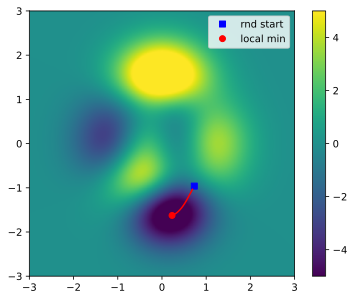

In [21]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

**_Additional explorations_**

In [22]:
# 1) Modify the code to force the initial guess to be [0,1.4]. Does the model reach a reasonable local minimum?
#
# 2) Using the same starting point, change the number of training epochs to 10,000. Does the final solution differ from
#    using 1000 epochs?
#
# 3) (Again with the same starting location) Change the learning to .1 (1000 epochs). What do you notice about the trajectory?
#    Try again with the learning rate set to .5, and then to .00001.
#


**_Gradient descent in 2D_**

**_maximizing_**

**_Gradient Ascent_**


In [23]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

**_Gradient descent in 2D_**

In [24]:
# This code defines a function peaks(x, y) that generates a 2D surface (a matrix of values, z) based on a mathematical expression.
# the "peaks" function
def peaks(x,y): # This function takes two arguments, x and y, which are expected to be arrays (or lists) of numerical values.
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y) # It creates two 2D arrays (grids) from the input 1D arrays x and y. x is repeated along rows, and y is repeated along columns to create a grid of points over the 2D plane. This operation is used to evaluate functions over a 2D grid.

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

1.   The function peaks(x, y) generates a 2D surface (i.e., a matrix of values) based on the mathematical expression provided.
2.  It first creates a 2D grid from the input x and y arrays using np.meshgrid().
3. It then calculates the values of z for each pair of (x, y) coordinates on this grid using a combination of polynomial and exponential terms.
4. The result z is a 2D array that can be used for visualization or further analysis.

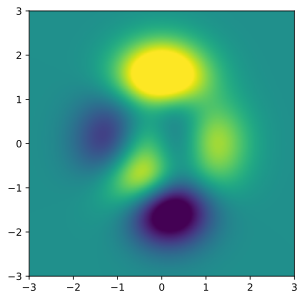

In [25]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
# extent=[x[0], x[-1], y[0], y[-1]] ensures the x and y axes are scaled according to the x and y arrays.
plt.show()

*   plt.imshow() is used to display a 2D matrix (Z) as an image.
*   extent controls the coordinate range for the plot's axes based on x and y.
* vmin and vmax control the color scale range.
* origin='lower' places the origin in the lower-left corner of the plot.

In [27]:
# This code snippet demonstrates how to compute the derivatives of a symbolic mathematical expression using the sympy library,
# and then convert those symbolic derivatives into executable functions using lambdify. The function lambdify is used to create
# functions that can be evaluated for numerical values.

# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy') # This function is used to define symbolic variables. Here, two symbolic variables sx and sy are created, which will represent the x and y variables in your mathematical expression.

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )
# This function is used to convert a symbolic expression (such as a derivative) into a numeric function that can be evaluated quickly.
# The first argument (sx, sy) specifies that the function will take sx and sy as inputs.
# The second argument is the symbolic expression you want to convert into a function, which in this case are the derivatives of sZ.
# The third argument 'sympy' tells lambdify to use sympy

# To maximize
#df_x = sym.lambdify( (sx,sy),sym.diff(-sZ,sx),'sympy' )
#df_y = sym.lambdify( (sx,sy),sym.diff(-sZ,sy),'sympy' )
df_x(1,1).evalf()
# Call the created function (df_x or df_y) with specific values of sx and sy, and use .evalf() to get a numerical result.

-1.07369833656079

In [28]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates, It will create numbers in uniform distribution [0,1], then *4 make it like [0.4, 0.7] * 4 would result in [1.6, 2.8]. Then -2, Subtract 2 shifts the range of values from [0, 4) to the range [-2, 2), and [1.6, 2.8] - 2 results in [ -0.4, 0.8 ]
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  # To maximize
  # localmin = localmin + learning_rate*grad
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[2.22026563330129 2.92031365072090]
[0.93343966 1.8499652 ]


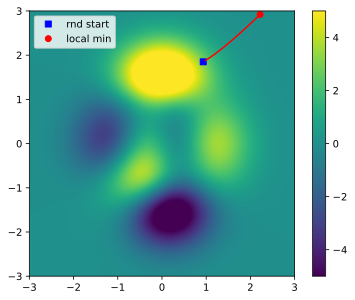

In [29]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

**_Additional explorations_**

In [30]:
# 1) Modify the code to force the initial guess to be [0,1.4]. Does the model reach a reasonable local minimum?
#
# 2) Using the same starting point, change the number of training epochs to 10,000. Does the final solution differ from
#    using 1000 epochs?
#
# 3) (Again with the same starting location) Change the learning to .1 (1000 epochs). What do you notice about the trajectory?
#    Try again with the learning rate set to .5, and then to .00001.
#

**_Gradient descent_**

**_Parametric experiments on g.d._**

In [31]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

**_Running experiments to understand gradient descent_**

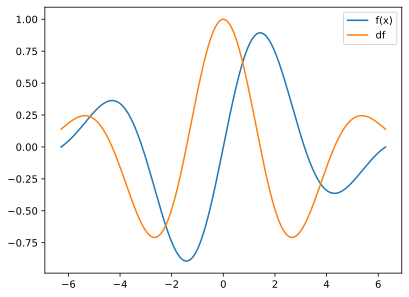

In [32]:
# the function
x  = np.linspace(-2*np.pi,2*np.pi,401) #401 specifies that the array should contain 401 points between -2π and 2π
fx = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

# quick plot for inspection
plt.plot(x,fx, x,df)
plt.legend(['f(x)','df']);

In [33]:
# function (note: over-writing variable names!)
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

initial guess [4.83805269]
local minima [4.31220177]


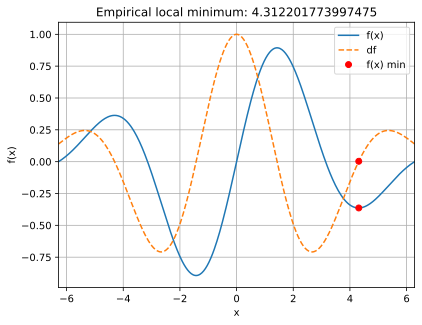

In [34]:
# random starting point
localmin = np.random.choice(x,1)#np.array([6])# is used to randomly select one element from the array x
print('initial guess', localmin)
# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad


print('local minima', localmin)
# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()


**_Run parametric experiments_**

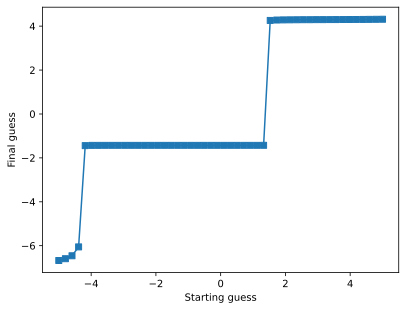

In [35]:
# Experiment 1: systematically varying the starting locations

startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx,localmin in enumerate(startlocs):

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

  # store the final guess
  finalres[idx] = localmin


# plot the results
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

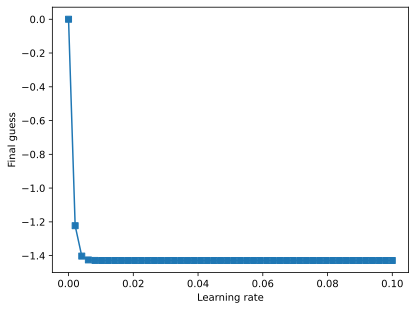

In [36]:
# Experiment 2: systematically varying the learning rate

learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

# loop over learning rates
for idx,learningRate in enumerate(learningrates):

  # force starting guess to 0
  localmin = 0

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learningRate*grad

  # store the final guess
  finalres[idx] = localmin


plt.plot(learningrates,finalres,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

In [37]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))



# loop over learning rates
for Lidx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for Eidx,trainEpochs in enumerate(training_epochs):

    # run through training (again fixing starting location)
    localmin = 0 # localmin is the variable that stores the current point (value) in the optimization process (in this case, the gradient descent process).
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad

    # store the final guess
    finalres[Lidx,Eidx] = localmin


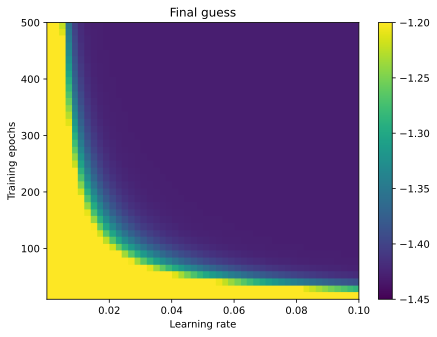

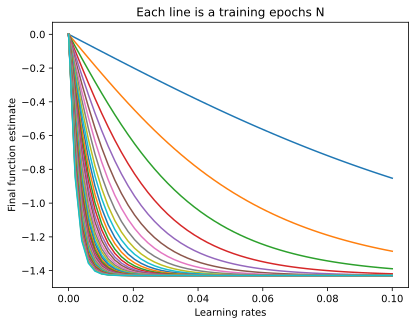

In [38]:
# plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres.T,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)

plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

**_Additional explorations_**

In [39]:
# 1) In experiment 3, set the starting location to be 1.6. Re-run the experiment and the image. You'll need to re-adjust
#    the figure color limits; check the line plots at the top of the code to determine a useful color range. Does the new
#    starting value change your conclusions about the interaction between learning rate and training epochs?
#
# 2) In the same experiment, now change the starting location to be random (use code: np.random.choice(x,1)). How do these
#    results look? Are you surprised? Are the results of this experiment still interpretable and what does this tell you
#    about running experiments in DL?
#

**_CodeChallenge: dynamic learning rates_**


In [40]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

**_Create the function and its derivative_**

In [41]:
# define a range for x
x = np.linspace(-2,2,2001)

# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

**_G.D. using a fixed learning rate_**

In [42]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):

  # compute gradient
  grad = deriv(localmin)

  # non-adaptive learning rate
  lr = learning_rate

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsFixed[i,0] = localmin
  modelparamsFixed[i,1] = grad
  modelparamsFixed[i,2] = lr
  #modelparamsFixed[i,:] = [localmin,grad,lr]

/tmp/ipython-input-1479471806.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,0] = localmin
/tmp/ipython-input-1479471806.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,1] = grad


**_G.D. using a gradient-based learning rate_**

In [43]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):

  # compute gradient
  grad = deriv(localmin)

  #* adapt the learning rate according to the gradient
  lr = learning_rate*np.abs(grad)

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsGrad[i,0] = localmin
  modelparamsGrad[i,1] = grad
  modelparamsGrad[i,2] = lr

/tmp/ipython-input-221558612.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,0] = localmin
/tmp/ipython-input-221558612.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,1] = grad
/tmp/ipython-input-221558612.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,2] = lr


**_G.D. using a time-based learning rate_**

In [44]:
# redefine parameters
learning_rate = .1
localmin = initval

# run through training and store all the results
modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*(1-(i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i,0] = localmin
  modelparamsTime[i,1] = grad
  modelparamsTime[i,2] = lr

/tmp/ipython-input-287006009.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,0] = localmin
/tmp/ipython-input-287006009.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,1] = grad


**learning_rate:**
This is the initial learning rate you set at the start of training.

**(i + 1) / training_epochs:**
1. i is the current epoch (ranging from 0 to training_epochs - 1).
2. i + 1 gives the current epoch index (starting from 1).
3. training_epochs is the total number of epochs you want to run.
4. (i + 1) / training_epochs calculates the fraction of epochs that have been completed. As i increases, this fraction increases from 0 to 1.

**1 - (i + 1) / training_epochs:**
1. This expression decreases as i increases. When i = 0 (the first epoch), the expression equals 1, meaning the learning rate is unchanged.
2. As i increases (as more epochs are completed), the expression becomes smaller, and the learning rate decreases.

**learning_rate * (1 - (i + 1) / training_epochs):**

1. This scales the initial learning rate by a factor that decays as the number of epochs increases.
2. The learning rate starts at the full learning_rate and decreases linearly as the number of epochs increases.
3. This means that the learning rate will gradually reduce towards 0 as the training progresses.

**_Plot the results_**

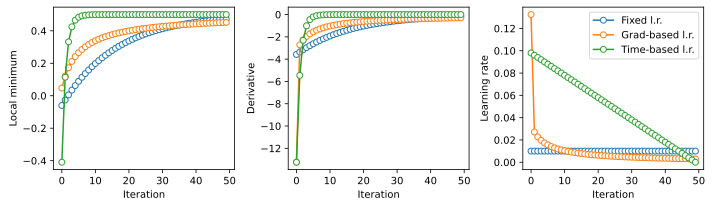

In [45]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()

**_Additional explorations_**

In [46]:
# 1) Change the initial learning rate in the "time" experiment from .1 to .01. Do you still reach the same conclusion that
#    dynamic learning rates are better than a fixed learning rate?
#
# 2) Compute the average of all time-based learning rates (see variable 'modelparamsTime'). Next, replace the fixed
#    learning rate with the average over all dynamic learning rates. How does that affect the model's performance?
#
# 3) Going back to the original code (without the modifications above), you saw that the fixed learning rate model didn't
#    get to the same local minimum. What happens if you increase the number of training epochs from 50 to 500? Does that
#    improve the situation, and what does that tell you about the relationship between learning rate and training epochs?
#
# 4) The code here initializes the starting value as a random number, which will differ for each learning rate method.
#    Is that appropriate or inappropriate for this experiment? Why? Change the code so that the starting value is the
#    same for all three learning rate models.
#